# NLP Github Project

In [1]:
import pandas as pd
import re
import unicodedata
import nltk
import prepare
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from math import log
import re
import prepare

### Questions to consider:
    -How many languages are there to explore/predict from the acquired repos?
    -Does each language have its own set of unique words?
    -How does word frequency change with each language?
    -What words frequently occur across all languages?
    -What is the most common programming language from all acquired repos?
    -What language is least common and will that make it more difficult to predict?

## Acquire

In [2]:
df = pd.read_csv('readmes.csv')

In [3]:
#6 languages to explore/predict
#C++ is most common, Ruby is least common
df.language.value_counts()

C++       81
php       72
Java      63
Python    46
Rust      36
Ruby      27
Name: language, dtype: int64

In [4]:
df.head()

,Unnamed: 0,language,readme
0,iluwatar/java-design-patterns,Java,Design patterns implemented in Java Introducti...
1,elastic/elasticsearch,Java,Elasticsearch A Distributed RESTful Search Eng...
2,Snailclimb/JavaGuide,Java,点击订阅Java面试进阶指南(专为Java面试方向准备)。为什么要弄这个专栏? Specia...
3,ReactiveX/RxJava,Java,RxJava: Reactive Extensions for the JVM RxJava...
4,spring-projects/spring-boot,Java,Spring Boot Spring Boot makes it easy to creat...


## Java

### Prepare

In [5]:
df_java = df[df.language == 'Java']

In [6]:
df_java.readme

0     Design patterns implemented in Java Introducti...
1     Elasticsearch A Distributed RESTful Search Eng...
2     点击订阅Java面试进阶指南(专为Java面试方向准备)。为什么要弄这个专栏? Specia...
3     RxJava: Reactive Extensions for the JVM RxJava...
4     Spring Boot Spring Boot makes it easy to creat...
5     Interviews Your personal guide to Software Eng...
6     Retrofit Type-safe HTTP client for Android and...
7     OkHttp An HTTP & HTTP/2 client for Android and...
8     Guava: Google Core Libraries for Java Guava is...
9     ⚡️ A powerful & easy to use chart library for ...
10    Apache Dubbo (incubating) Project Apache Dubbo...
11    Glide | View Glide's documentation | 简体中文文档 | ...
12    Lottie for Android& iOS& React Native& Web& an...
13    Butter Knife Field and method binding for Andr...
14    暂停维护此项目 首先感谢大家支持和反馈才使得proxyee-down能一直迭代到现在的版本，...
15    README of Chinese About AndroidUtilCode 🔥 is a...
16    Project in Maintenance Mode Only The project i...
17    There is an English version of README here

In [7]:
java_readme = ' '.join(df_java.readme)

In [8]:
java_readme = prepare.basic_clean(java_readme)

In [9]:
java_readme = prepare.stem_words(java_readme)

In [10]:
java_readme

'design pattern implement in java introduct design pattern are the best formal practic a programm can use to solv common problem when design an applic or system design pattern can speed up the develop process by provid test proven develop paradigm reus design pattern help prevent subtl issu which caus major problem and it also improv code readabl for coder and architect who are familiar with the pattern get start befor you dive into the materi you should be familiar with variou programmingsoftwar design principl all design should be as simpl as possibl you should start with kiss yagni and do the simplest thing that could possibl work principl complex and pattern should onli be introduc when they are need for practic extens onc you are familiar with these concept you can start drill down into pattern by ani of the follow approach use difficulti tag difficultybeginn difficultyintermedi difficultyexpert use pattern categori creation behavior and other search for a specif pattern cant find

In [11]:
java_readme = prepare.drop_stop_words(java_readme)

### Explore

In [12]:
#top 10 most frequently used words in Java readmes
pd.Series(java_readme.split()).value_counts().head(10)

use        313
thi        223
licens     193
build      134
depend     125
spring     122
boot       112
project    109
support    104
code       103
dtype: int64

In [13]:
#get all the individual words in the readmes into a list
java_words = list(pd.Series(java_readme.split()))

In [14]:
#Top 20 bigrams
top_20_java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
                      .value_counts()
                      .head(20))

top_20_java_bigrams.head()

(spring, boot)       79
(licens, may)        34
(overrid, public)    28
(boot, spring)       26
(case, perform)      24
dtype: int64

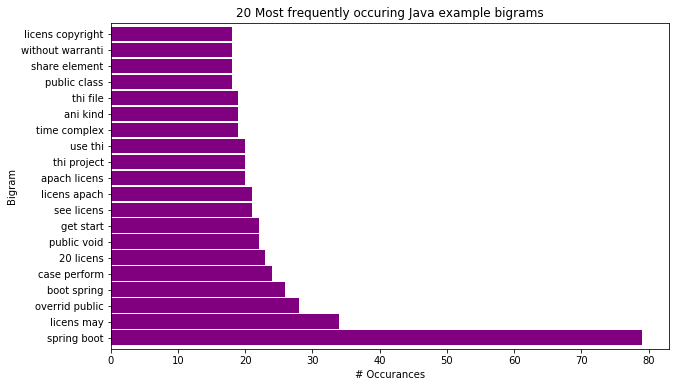

In [15]:
top_20_java_bigrams.plot.barh(color='purple', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Java example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_java_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

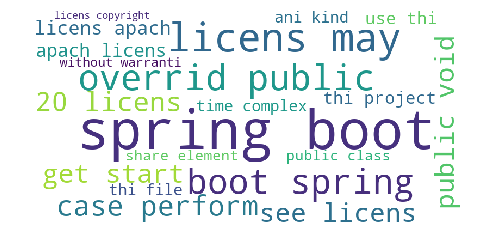

In [16]:
#Wordcloud for java bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_java_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## PHP

### Acquire/Prep

In [17]:
df_php = df[df.language == 'php']

In [18]:
df_php.readme

226    koel Intro Koel (also stylized as koel& with a...
227    whoops PHP errors for cool kids whoops is an e...
228    Sage Sage is a WordPress starter theme with a ...
229    Slim Framework Slim is a PHP micro-framework t...
230    Cachet is a beautiful and powerful open source...
231    Phalcon Framework Phalcon is an open source we...
232    League\Flysystem Flysystem is a filesystem abs...
233    Laravel Debugbar Note for v3: Debugbar is now ...
234    PHP dotenv Loads environment variables from .e...
235    About Flarum Flarum is a delightfully simple d...
236    ramsey/uuid ramsey/uuid is a PHP 7.2+ library ...
237    Motto: "Every business should have a detection...
238    October is a Content Management System (CMS) a...
239    The Dingo API package is meant to provide you&...
240    Laravel 5 IDE Helper Generator For Laravel 4.x...
241    Voyager - The Missing Laravel Admin Made with ...
242    EasyWeChat 📦 It is probably the best SDK in th...
243    Swift Mailer -----------

In [19]:
php_readme = ' '.join(df_php.readme)

In [20]:
php_readme = prepare.clean(php_readme)

In [21]:
php_readme

'koel intro koel also styliz koel lowercas k simpl webbas person audio stream servic written vue client side laravel server side target web develop koel embrac modern web technolog flexbox audio draganddrop api name job instal upgrad guid system requir installationupgrad guid troubleshoot etc head offici document contribut contribut big small warmheartedli welcom pleas note howev want work new featur first open issu make sure someth desir greatli save time us backer support us monthli donat help us continu activ becom backer sponsor becom sponsor get logo readm github link site becom sponsor whoop error cool kid whoop error handler framework outofthebox provid pretti error interfac help debug web project heart simpl yet power stack error handl system featur flexibl stackbas error handl standalon librari current requir depend simpl api deal except trace frame data includ pretti rad error page webapp project includ abil open referenc file directli editor ide includ handler differ respons

### Explore

In [22]:
#top 10 most frequently used words in php readmes
pd.Series(php_readme.split()).value_counts().head(10)

use         692
function    345
class       257
new         246
default     222
file        198
method      193
option      174
permiss     173
user        167
dtype: int64

In [23]:
#get all the individual words in the readmes into a list
php_words = list(pd.Series(php_readme.split()))

In [24]:
#Top 20 bigrams
top_20_php_bigrams = (pd.Series(nltk.ngrams(php_words, 2))
                      .value_counts()
                      .head(20))

top_20_php_bigrams.head()

(symfoni, phpcsfixer)    102
(public, function)       101
(messag, check)           79
(configur, option)        75
(riski, rule)             54
dtype: int64

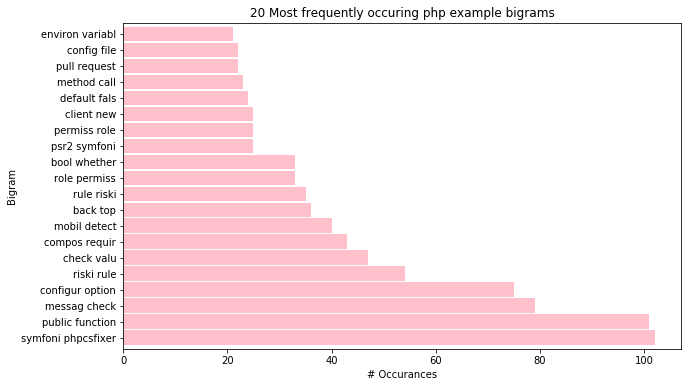

In [25]:
top_20_php_bigrams.plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring php example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_php_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

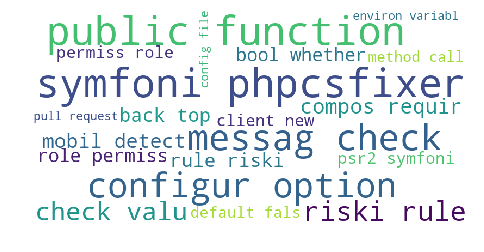

In [26]:
#Wordcloud for php bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_php_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Python

### Acquire/Prep

In [27]:
df_python = df[df.language == 'Python']

In [28]:
df_python = df_python.readme.fillna('0')

In [29]:
python_readme = ' '.join(df_python)

In [30]:
python_readme = prepare.clean(python_readme)

In [31]:
python_readme

'top languag load english arab bengali brazilian portugues german greek italian korean persian polish russian spanish thai turkish vietnames add translat system design primer motiv learn design largescal system prep system design interview learn design largescal system learn design scalabl system help becom better engin system design broad topic vast amount resourc scatter throughout web system design principl repo organ collect resourc help learn build system scale learn open sourc commun continu updat open sourc project contribut welcom prep system design interview addit code interview system design requir compon technic interview process mani tech compani practic common system design interview question compar result sampl solut discuss code diagram addit topic interview prep studi guid approach system design interview question system design interview question solut objectori design interview question solut addit system design interview question anki flashcard provid anki flashcard d

### Explore

In [32]:
#top 10 most frequently used words in php readmes
pd.Series(python_readme.split()).value_counts().head(10)

use        839
unknown    539
file       448
instal     431
data       398
option     372
command    277
complet    276
support    263
http       244
dtype: int64

In [33]:
#get all the individual words in the readmes into a list
python_words = list(pd.Series(python_readme.split()))

In [34]:
#Top 20 bigrams
top_20_python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
                      .value_counts()
                      .head(20))

top_20_python_bigrams.head()

(apikey, unknown)    201
(oauth, unknown)      82
(arxiv, preprint)     80
(et, al)              68
(system, design)      58
dtype: int64

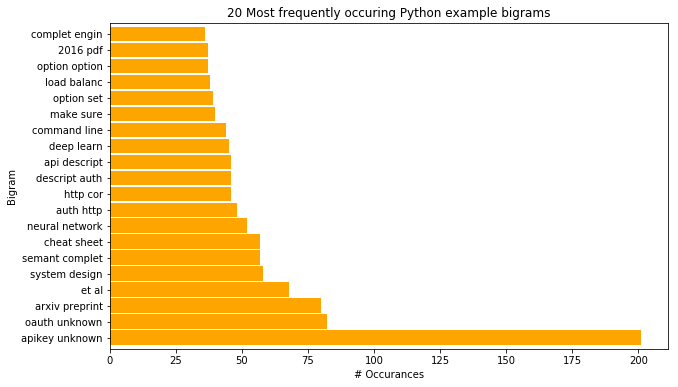

In [35]:
top_20_python_bigrams.plot.barh(color='orange', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Python example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_python_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

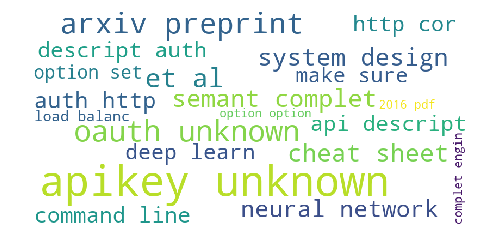

In [36]:
#Wordcloud for php bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_python_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## C++

### Acquire/Prep

In [37]:
df_c = df[df.language == 'C++']

In [38]:
df_c = df_c.readme.fillna('0')

In [39]:
c_readme = ' '.join(df_c)

In [40]:
c_readme = prepare.clean(c_readme)

In [41]:
c_readme

'ostutori creat os scratch alway want learn make os scratch colleg taught implement advanc featur pagin semaphor memori manag etc never got start boot sector colleg hard dont rememb im fed peopl think read alreadi exist kernel even small good idea learn oper system inspir document osdev wiki ill tri make short stepbystep readm code sampl anybodi follow honestli tutori basic first document split smaller piec without theori updat sourc littl book os develop jamesm kernel develop tutori featur cours code tutori aim peopl comfort low level comput exampl programm curios os work dont time willpow start read linux kernel top bottom littl theori featur googl theori lectur pass colleg excess theori wors theori make thing seem difficult realli lesson tini may take 515 minut complet trust trust use tutori start first folder go order build previou code jump right folder 05 dont know mov ah 0x0e miss lectur 02 realli go order alway skip stuff alreadi know open readm read first line detail concept f

### Explore

In [42]:
#top 10 most frequently used words in php readmes
pd.Series(c_readme.split()).value_counts().head(10)

use       768
valu      453
return    450
key       400
build     382
file      339
set       324
messag    316
job       289
instal    281
dtype: int64

In [43]:
#get all the individual words in the readmes into a list
c_words = list(pd.Series(c_readme.split()))

In [44]:
#Top 20 bigrams
top_20_c_bigrams = (pd.Series(nltk.ngrams(c_words, 2))
                      .value_counts()
                      .head(20))

top_20_c_bigrams.head()

(return, valu)     171
(paramet, key)      82
(sourc, code)       46
(sort, set)         46
(pull, request)     42
dtype: int64

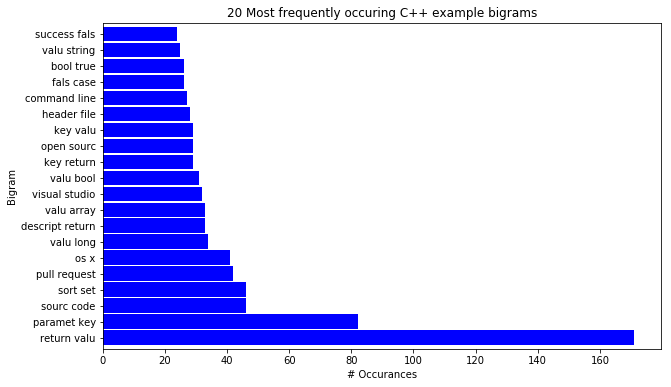

In [45]:
top_20_c_bigrams.plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring C++ example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_c_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

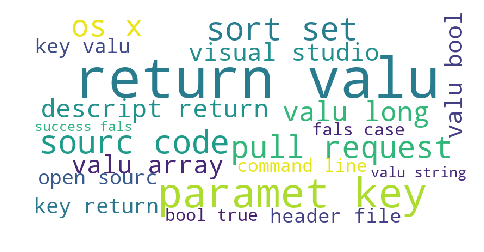

In [46]:
#Wordcloud for php bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_c_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Ruby

### Acquire/Prep

In [47]:
df_ruby = df[df.language == 'Ruby']

In [48]:
ruby_readme = ' '.join(df_ruby.readme)

In [49]:
ruby_readme = prepare.clean(ruby_readme)

In [50]:
ruby_readme

'scientist librari care refactor critic path scienc let pretend your chang way handl permiss larg web app test help guid refactor realli want compar current refactor behavior load requir scientist class mywidget def allowsus experi scientistdefaultnew widgetpermiss experimentus modelcheckuseruservalid old way experimenttri usercanread model new way experimentrun end end wrap use block around code origin behavior wrap tri around new behavior experimentrun alway return whatev use block return bunch stuff behind scene decid whether run tri block random order use tri block run measur durat behavior compar result tri result use swallow record except rais tri block publish inform use block call control tri block call candid creat experi wordi includ scientist modul scienc helper instanti experi call run requir scientist class mywidget includ scientist def allowsus scienc widgetpermiss experi experimentus modelcheckuseruservalid old way experimenttri usercanread model new way end return contr

### Explore

In [51]:
#top 10 most frequently used words in php readmes
pd.Series(ruby_readme.split()).value_counts().head(10)

use       381
end       292
code      165
class     151
method    128
tag       128
gem       127
i100m     124
instal    118
decor     111
dtype: int64

In [52]:
#get all the individual words in the readmes into a list
ruby_words = list(pd.Series(ruby_readme.split()))

In [53]:
#Top 20 bigrams
top_20_ruby_bigrams = (pd.Series(nltk.ngrams(ruby_words, 2))
                      .value_counts()
                      .head(20))

top_20_ruby_bigrams.head()

(end, end)                         83
(product, applicationrecord)       38
(class, product)                   38
(x8664darwin14, calcul)            34
(applicationrecord, searchkick)    31
dtype: int64

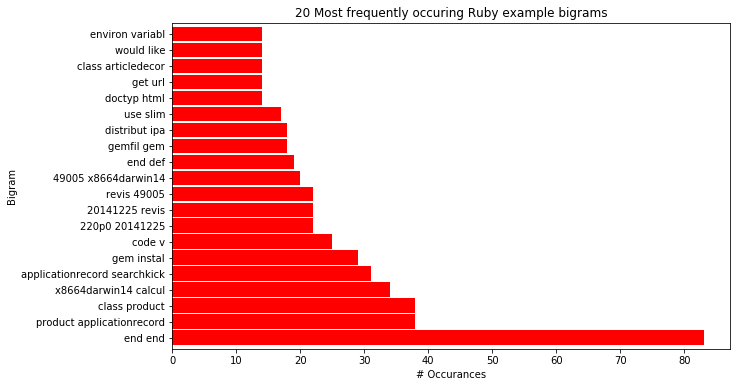

In [54]:
top_20_ruby_bigrams.plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Ruby example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_ruby_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

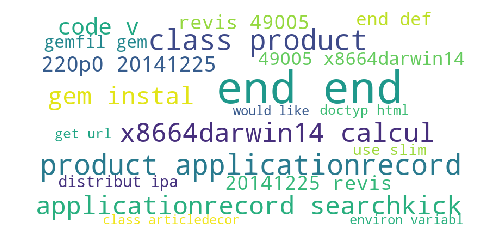

In [55]:
#Wordcloud for php bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ruby_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Rust

### Acquire/Prep

In [56]:
df_rust = df[df.language == 'Rust']

In [57]:
rust_readme = ' '.join(df_rust.readme)

In [58]:
rust_readme = prepare.clean(rust_readme)

In [59]:
rust_readme

'sled alpha modern embed databas use sleddb let tree dbstartdefaultpath set get treesetk v1 asserteqtreegetk oksomev1 compar swap treecask somev1 somev2 scan forward let mut iter treescank asserteqiternext someokk v2 asserteqiternext none delet treedelk block oper ondisk treeflush also support merg oper featur api similar threadsaf btreemapvecu8 vecu8 fulli atom singlekey oper support ca zerocopi read subscriptionwatch semant key prefix multipl keyspac support merg oper forward revers iter crashsaf monoton id gener capabl gener 75125 million id per second zstd compress use compress build featur cpuscal lockfre implement ssdoptim logstructur storag goal dont make user think interfac obviou dont surpris user perform trap dont wake oper bring reliabl techniqu academia realworld practic dont use much electr data structur play modern hardwar strength plan lsm treelik write perform tradit b treelik read perform mvcc serializ transact snapshot forwardcompat binari format concurr snapshot delt

### Explore

In [60]:
#top 10 most frequently used words in php readmes
pd.Series(rust_readme.split()).value_counts().head(10)

use        254
build      123
instal      95
run         93
code        77
cargo       72
let         70
exampl      68
featur      64
project     62
dtype: int64

In [61]:
#get all the individual words in the readmes into a list
rust_words = list(pd.Series(rust_readme.split()))

In [62]:
#Top 20 bigrams
top_20_rust_bigrams = (pd.Series(nltk.ngrams(rust_words, 2))
                      .value_counts()
                      .head(20))

top_20_rust_bigrams.head()

(cargo, build)      22
(pull, request)     13
(get, start)        12
(data, structur)    12
(cargo, instal)     11
dtype: int64

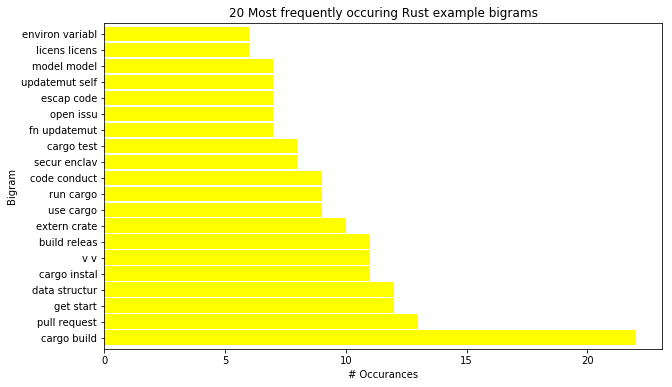

In [63]:
top_20_rust_bigrams.plot.barh(color='yellow', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring Rust example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_rust_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

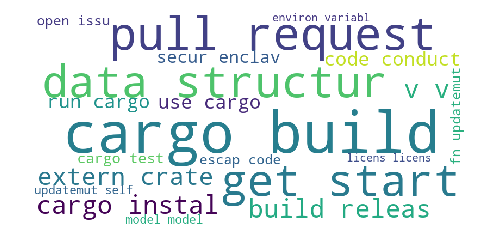

In [64]:
#Wordcloud for rust bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_rust_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## All

### Acquire/Prep

In [65]:
df_all = df

In [66]:
df_all = df_all.readme.fillna('0')

In [67]:
df_all = ' '.join(df_all)

In [68]:
df_all_readme = prepare.clean(df_all)

In [69]:
df_all_readme

'design pattern implement introduct design pattern best formal practic programm use solv common problem design applic system design pattern speed develop process provid test proven develop paradigm reus design pattern help prevent subtl issu caus major problem also improv code readabl coder architect familiar pattern get start dive materi familiar variou programmingsoftwar design principl design simpl possibl start kiss yagni simplest thing could possibl work principl complex pattern introduc need practic extens familiar concept start drill pattern follow approach use difficulti tag difficultybeginn difficultyintermedi difficultyexpert use pattern categori creation behavior other search specif pattern cant find one pleas report new pattern contribut will contribut project find relev inform develop wiki help answer question gitter chatroom licens project licens term mit licens elasticsearch distribut rest search engin httpswwwelasticcoproductselasticsearch elasticsearch distribut rest s

### Explore

In [70]:
#top 10 most frequently used words in php readmes
pd.Series(df_all_readme.split()).value_counts().head(10)

use        3247
file       1172
instal     1109
code        968
option      940
support     895
run         817
set         812
valu        798
return      784
dtype: int64

In [71]:
#get all the individual words in the readmes into a list
df_all_words = list(pd.Series(df_all_readme.split()))

In [72]:
#Top 20 bigrams
top_20_all_bigrams = (pd.Series(nltk.ngrams(df_all_words, 2))
                      .value_counts()
                      .head(20))

top_20_all_bigrams.head()

(apikey, unknown)    201
(return, valu)       177
(pull, request)      119
(make, sure)         110
(command, line)      110
dtype: int64

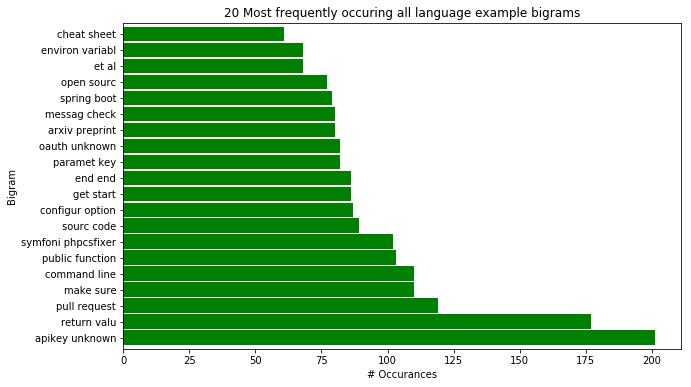

In [73]:
top_20_all_bigrams.plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring all language example bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

ticks, _ = plt.yticks()
labels = top_20_all_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

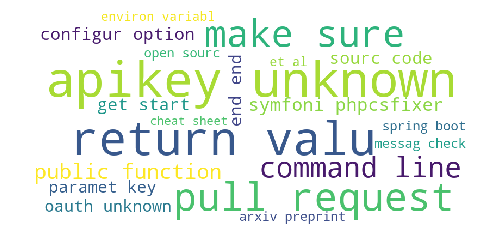

In [74]:
#Wordcloud for rust bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Model

In [77]:
from sklearn.gaussian_process import GaussianProcessClassifier as Gclass
from sklearn.model_selection import train_test_split

In [79]:
df.dropna(inplace=True)
df['clean'] = [prepare.clean(readme)for readme in df.readme]

In [81]:
X = df['clean']
y = df['language']

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y)